In [26]:
import os, sys, random, copy, json, time
import numpy as np
import cv2
import imutils
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Dense, Conv2D, Dropout, 
                                     Flatten, MaxPooling2D)
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
sys.path.append('../')

In [4]:
from utils.utils import makeMini, myPlot, answerToPoints, meanTruth, newVals, iterMean
from scorer_scripts_v2.scorer_scripts_v2.score_detections import score
from starter_scripts_v2.starter_scripts_v2.helper import plot_bbox

from utils.misc import contrivedLabel, plotLabel, summaryStats, bagData
from models.model import ModelBuilder
from models.data import DataXPrep, DataYPrep

In [5]:
p_truth = '../truth_new.json'
with open(p_truth, 'r') as f:
    truth = json.load(f)
list(truth.items())[:3]

[('IMG_9622.JPG', [[583, 439, 772, 431, 779, 628, 582, 631]]),
 ('IMG_9925.JPG', [[481, 295, 769, 268, 777, 590, 480, 589]]),
 ('IMG_6733.JPG', [[593, 362, 650, 399, 649, 597, 589, 592]])]

In [6]:
truth_0 = {}
for k in truth.keys():
    if len(truth[k][0]) > 0:
        truth_0[k] = truth[k][0][0]

truth_1 = {}
for k in truth.keys():
    if len(truth[k][0]) > 0:
        truth_1[k] = truth[k][0][1]
        
print (list(truth_0.items())[:3], '\n', list(truth_1.items())[:3])

[('IMG_9622.JPG', 583), ('IMG_9925.JPG', 481), ('IMG_6733.JPG', 593)] 
 [('IMG_9622.JPG', 439), ('IMG_9925.JPG', 295), ('IMG_6733.JPG', 362)]


In [7]:
p_training = '../Data_Training/Data_Training/'
def loadImg(fn):
    return cv2.imread(p_training + fn)

In [12]:
random.seed(a=0, version=2)
N = 1000
batch = random.sample(list(truth_0.keys()), N)  # use truth_0 with no missing rects

In [ ]:
x_load = [loadImg(k) for k in batch]

In [86]:
y0_load = [truth_0[k] for k in batch]
y1_load = [truth_1[k] for k in batch]

In [22]:
from models.data import DataXPrep, DataYPrep

In [87]:
yPrep = DataYPrep()
y0 = yPrep.normData_static(y0_load)
y1 = yPrep.normData_static(y1_load)

In [16]:
xPrep = DataXPrep(data=x_load)
xPrep.buildDataT(
               b_resize=True,
               resize_width=108,
               b_cvt_grayscale=False
              )
x_t = xPrep.getDataT()
input_shape = xPrep.getImgTShape()

In [23]:
xPrep = DataXPrep(data=x_load)
xPrep.buildDataT(
               b_resize=True,
               resize_width=216,
               b_cvt_grayscale=False
              )
x_t_large = xPrep.getDataT()
input_shape_large = xPrep.getImgTShape()

In [24]:
input_shape_large

(144, 216, 3)

In [17]:
from tensorflow.keras.layers import (Dense, Conv2D, Dropout, 
                                     Flatten, MaxPooling2D)

### Run Param Loop:

results in mb_y0, mb_y1, time_log, time_log_y1

set EPOCHS = 2 or 100

In [38]:
#free up memory? doesn't
del x_load

In [39]:
mb_y0 = ModelBuilder()
mb_y1 = ModelBuilder()

In [40]:
EPOCHS = 100
time_log = {}

for scenario in ['a','b','c','d','e','f','g','h','i','j','k',
                 'cd', 'fg','ec' ]:
    
    #defaults
    _vsplit = 0.5
    _epochs = EPOCHS
    _filters = 28
    _kerneln = 3
    _denseunits = 128
    _dropoutfrac = 0.2
    _lr = 0.001
    _inputshape = input_shape
    _x = x_t
    
    if 'a' in scenario:
        pass
    if 'b' in scenario:
        _epochs = EPOCHS*2
    if 'c' in scenario:
        _filters = 28*2
    if 'd' in scenario:
        _kerneln = 6
    if 'e' in scenario:
        _inputshape = input_shape_large
        _x = x_t_large
    if 'f' in scenario:
        _lr=0.002
    if 'g' in scenario:
        _denseunits = 256
    if 'h' in scenario:
        _dropoutfrac=0.3
    if 'i' in scenario:
        _dropoutfrac=0.1
    if 'j' in scenario:
        v_split = 0.2

    print('-------------------------------------------------------')
    print(scenario)
    
    mb_y0.setInputShape(_inputshape)
    
    mb_y0.buildModel(filters=_filters,
                     kernel_n=_kerneln,
                     dense_units=_denseunits,
                     dropout_frac=_dropoutfrac,
                     lr=_lr
                     
                    )
    
    t0 = time.time()
    
    mb_y0.fitModel(x=_x, y=y0, epochs=_epochs, validation_split=_vsplit)
    
    t1 = time.time()
    
    time_log[scenario] = t1 - t0
    
    


-------------------------------------------------------
a
Train on 500 samples, validate on 500 samples
Epoch 1/100
500/500 [==============================] - 6s 12ms/sample - loss: 32831551.7368 - mean_absolute_error: 1722.4116 - mean_squared_error: 32831554.0000 - val_loss: 15204.8788 - val_mean_absolute_error: 95.8133 - val_mean_squared_error: 15204.8779
Epoch 2/100
500/500 [==============================] - 5s 11ms/sample - loss: 52143.1304 - mean_absolute_error: 181.3826 - mean_squared_error: 52143.1367 - val_loss: 46983.2733 - val_mean_absolute_error: 198.5157 - val_mean_squared_error: 46983.2695
Epoch 3/100
500/500 [==============================] - 5s 10ms/sample - loss: 60869.0177 - mean_absolute_error: 196.9146 - mean_squared_error: 60869.0156 - val_loss: 12960.3854 - val_mean_absolute_error: 92.7771 - val_mean_squared_error: 12960.3838
Epoch 4/100
500/500 [==============================] - 5s 10ms/sample - loss: 49224.1742 - mean_absolute_error: 179.5175 - mean_squared_error

500/500 [==============================] - 6s 12ms/sample - loss: 9440.8217 - mean_absolute_error: 78.6708 - mean_squared_error: 9440.8223 - val_loss: 11903.3623 - val_mean_absolute_error: 87.7792 - val_mean_squared_error: 11903.3633
Epoch 67/100
500/500 [==============================] - 5s 11ms/sample - loss: 9875.8816 - mean_absolute_error: 80.2834 - mean_squared_error: 9875.8818 - val_loss: 14774.2005 - val_mean_absolute_error: 98.9753 - val_mean_squared_error: 14774.2002
Epoch 68/100
500/500 [==============================] - 6s 11ms/sample - loss: 7568.1798 - mean_absolute_error: 69.3844 - mean_squared_error: 7568.1802 - val_loss: 12077.6481 - val_mean_absolute_error: 88.5830 - val_mean_squared_error: 12077.6484
Epoch 69/100
500/500 [==============================] - 6s 11ms/sample - loss: 10190.4038 - mean_absolute_error: 81.5294 - mean_squared_error: 10190.4043 - val_loss: 8855.3923 - val_mean_absolute_error: 73.3820 - val_mean_squared_error: 8855.3916
Epoch 70/100
500/500 [===

500/500 [==============================] - 6s 11ms/sample - loss: 11606.8939 - mean_absolute_error: 85.1054 - mean_squared_error: 11606.8926 - val_loss: 23209.0455 - val_mean_absolute_error: 133.8811 - val_mean_squared_error: 23209.0469
Epoch 32/200
500/500 [==============================] - 6s 11ms/sample - loss: 14606.7719 - mean_absolute_error: 96.2437 - mean_squared_error: 14606.7734 - val_loss: 22282.1203 - val_mean_absolute_error: 126.6369 - val_mean_squared_error: 22282.1211
Epoch 33/200
500/500 [==============================] - 6s 11ms/sample - loss: 25560.8609 - mean_absolute_error: 117.1497 - mean_squared_error: 25560.8633 - val_loss: 6792.5973 - val_mean_absolute_error: 63.4213 - val_mean_squared_error: 6792.5981
Epoch 34/200
500/500 [==============================] - 6s 11ms/sample - loss: 12240.7258 - mean_absolute_error: 89.1486 - mean_squared_error: 12240.7246 - val_loss: 7321.3835 - val_mean_absolute_error: 65.8800 - val_mean_squared_error: 7321.3828
Epoch 35/200
500/5

500/500 [==============================] - 6s 11ms/sample - loss: 8023.8742 - mean_absolute_error: 71.4162 - mean_squared_error: 8023.8745 - val_loss: 8542.1247 - val_mean_absolute_error: 71.6737 - val_mean_squared_error: 8542.1240
Epoch 98/200
500/500 [==============================] - 6s 12ms/sample - loss: 7630.1606 - mean_absolute_error: 69.1563 - mean_squared_error: 7630.1606 - val_loss: 12382.6042 - val_mean_absolute_error: 87.6012 - val_mean_squared_error: 12382.6055
Epoch 99/200
500/500 [==============================] - 6s 11ms/sample - loss: 7740.1288 - mean_absolute_error: 67.3309 - mean_squared_error: 7740.1284 - val_loss: 9242.8069 - val_mean_absolute_error: 74.0788 - val_mean_squared_error: 9242.8066
Epoch 100/200
500/500 [==============================] - 6s 11ms/sample - loss: 9080.5175 - mean_absolute_error: 73.2390 - mean_squared_error: 9080.5156 - val_loss: 7703.9048 - val_mean_absolute_error: 65.3223 - val_mean_squared_error: 7703.9048
Epoch 101/200
500/500 [=======

500/500 [==============================] - 5s 10ms/sample - loss: 8845.9883 - mean_absolute_error: 74.0746 - mean_squared_error: 8845.9893 - val_loss: 8884.7099 - val_mean_absolute_error: 70.2293 - val_mean_squared_error: 8884.7100
Epoch 164/200
500/500 [==============================] - 5s 10ms/sample - loss: 7781.7407 - mean_absolute_error: 68.5302 - mean_squared_error: 7781.7412 - val_loss: 8402.7022 - val_mean_absolute_error: 68.5959 - val_mean_squared_error: 8402.7021
Epoch 165/200
500/500 [==============================] - 5s 10ms/sample - loss: 8180.6156 - mean_absolute_error: 73.1268 - mean_squared_error: 8180.6157 - val_loss: 12937.8300 - val_mean_absolute_error: 90.1512 - val_mean_squared_error: 12937.8291
Epoch 166/200
500/500 [==============================] - 5s 10ms/sample - loss: 8362.4187 - mean_absolute_error: 72.4286 - mean_squared_error: 8362.4189 - val_loss: 7988.6408 - val_mean_absolute_error: 65.9847 - val_mean_squared_error: 7988.6411
Epoch 167/200
500/500 [=====

500/500 [==============================] - 9s 17ms/sample - loss: 37798.0673 - mean_absolute_error: 157.7262 - mean_squared_error: 37798.0664 - val_loss: 13581.5105 - val_mean_absolute_error: 94.6416 - val_mean_squared_error: 13581.5107
Epoch 29/100
500/500 [==============================] - 9s 17ms/sample - loss: 22648.4726 - mean_absolute_error: 120.0110 - mean_squared_error: 22648.4746 - val_loss: 7976.5635 - val_mean_absolute_error: 69.1027 - val_mean_squared_error: 7976.5635
Epoch 30/100
500/500 [==============================] - 9s 17ms/sample - loss: 24093.6795 - mean_absolute_error: 121.4210 - mean_squared_error: 24093.6797 - val_loss: 29800.4215 - val_mean_absolute_error: 129.9027 - val_mean_squared_error: 29800.4238
Epoch 31/100
500/500 [==============================] - 9s 17ms/sample - loss: 34214.3741 - mean_absolute_error: 139.3306 - mean_squared_error: 34214.3789 - val_loss: 24313.1370 - val_mean_absolute_error: 136.8565 - val_mean_squared_error: 24313.1406
Epoch 32/100


Epoch 61/100
500/500 [==============================] - 9s 17ms/sample - loss: 16853.3245 - mean_absolute_error: 100.8975 - mean_squared_error: 16853.3242 - val_loss: 8877.3732 - val_mean_absolute_error: 70.8601 - val_mean_squared_error: 8877.3730
Epoch 62/100
500/500 [==============================] - 9s 17ms/sample - loss: 14617.5488 - mean_absolute_error: 93.9396 - mean_squared_error: 14617.5469 - val_loss: 8102.7621 - val_mean_absolute_error: 71.2285 - val_mean_squared_error: 8102.7627
Epoch 63/100
500/500 [==============================] - 9s 17ms/sample - loss: 14132.0995 - mean_absolute_error: 96.6438 - mean_squared_error: 14132.0986 - val_loss: 13299.3113 - val_mean_absolute_error: 93.6685 - val_mean_squared_error: 13299.3115
Epoch 64/100
500/500 [==============================] - 9s 17ms/sample - loss: 14771.0373 - mean_absolute_error: 95.7188 - mean_squared_error: 14771.0371 - val_loss: 7749.9036 - val_mean_absolute_error: 65.9003 - val_mean_squared_error: 7749.9028
Epoch 65/

500/500 [==============================] - 9s 17ms/sample - loss: 12917.2808 - mean_absolute_error: 89.3636 - mean_squared_error: 12917.2803 - val_loss: 15378.3574 - val_mean_absolute_error: 104.1252 - val_mean_squared_error: 15378.3574
Epoch 95/100
500/500 [==============================] - 9s 17ms/sample - loss: 10177.4589 - mean_absolute_error: 81.1515 - mean_squared_error: 10177.4580 - val_loss: 12011.6743 - val_mean_absolute_error: 87.4519 - val_mean_squared_error: 12011.6729
Epoch 96/100
500/500 [==============================] - 9s 17ms/sample - loss: 12781.6720 - mean_absolute_error: 90.1502 - mean_squared_error: 12781.6709 - val_loss: 26296.7002 - val_mean_absolute_error: 143.5121 - val_mean_squared_error: 26296.7012
Epoch 97/100
500/500 [==============================] - 9s 17ms/sample - loss: 10803.2102 - mean_absolute_error: 84.1771 - mean_squared_error: 10803.2100 - val_loss: 8173.7691 - val_mean_absolute_error: 66.8849 - val_mean_squared_error: 8173.7681
Epoch 98/100
500/

Epoch 59/100
500/500 [==============================] - 9s 17ms/sample - loss: 17191.5713 - mean_absolute_error: 102.1588 - mean_squared_error: 17191.5723 - val_loss: 25881.3167 - val_mean_absolute_error: 138.5755 - val_mean_squared_error: 25881.3184
Epoch 60/100
500/500 [==============================] - 9s 17ms/sample - loss: 18987.9141 - mean_absolute_error: 111.3350 - mean_squared_error: 18987.9121 - val_loss: 8440.3248 - val_mean_absolute_error: 71.1105 - val_mean_squared_error: 8440.3252
Epoch 61/100
500/500 [==============================] - 9s 17ms/sample - loss: 21719.8897 - mean_absolute_error: 114.4527 - mean_squared_error: 21719.8906 - val_loss: 34823.2419 - val_mean_absolute_error: 170.8448 - val_mean_squared_error: 34823.2383
Epoch 62/100
500/500 [==============================] - 9s 17ms/sample - loss: 18279.6851 - mean_absolute_error: 108.3040 - mean_squared_error: 18279.6836 - val_loss: 8487.3964 - val_mean_absolute_error: 70.0813 - val_mean_squared_error: 8487.3975
Ep

Epoch 92/100
500/500 [==============================] - 9s 17ms/sample - loss: 16438.4701 - mean_absolute_error: 102.6380 - mean_squared_error: 16438.4707 - val_loss: 7273.8583 - val_mean_absolute_error: 64.4724 - val_mean_squared_error: 7273.8579
Epoch 93/100
500/500 [==============================] - 9s 17ms/sample - loss: 11273.9937 - mean_absolute_error: 83.9461 - mean_squared_error: 11273.9941 - val_loss: 19053.3588 - val_mean_absolute_error: 118.8700 - val_mean_squared_error: 19053.3594
Epoch 94/100
500/500 [==============================] - 9s 17ms/sample - loss: 13005.3323 - mean_absolute_error: 89.8844 - mean_squared_error: 13005.3320 - val_loss: 9430.2110 - val_mean_absolute_error: 77.2665 - val_mean_squared_error: 9430.2109
Epoch 95/100
500/500 [==============================] - 9s 17ms/sample - loss: 16204.1469 - mean_absolute_error: 103.9399 - mean_squared_error: 16204.1465 - val_loss: 8208.0936 - val_mean_absolute_error: 69.2812 - val_mean_squared_error: 8208.0938
Epoch 9

ResourceExhaustedError: OOM when allocating tensor with shape[212716,128] and type float on /job:localhost/replica:0/task:0/device:CPU:0 by allocator cpu
	 [[{{node training_42/RMSprop/Square_2}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.


In [42]:
EPOCHS = 100
time_log_y1 = {}

for scenario in ['a','b','c','d','e','f','g','h','i','j','k',
                 'cd', 'fg','ec' ]:
    
    #defaults
    _vsplit = 0.5
    _epochs = EPOCHS
    _filters = 28
    _kerneln = 3
    _denseunits = 128
    _dropoutfrac = 0.2
    _lr = 0.001
    _inputshape = input_shape
    _x = x_t
    
    if 'a' in scenario:
        pass
    if 'b' in scenario:
        _epochs = EPOCHS*2
    if 'c' in scenario:
        _filters = 28*2
    if 'd' in scenario:
        _kerneln = 6
    if 'e' in scenario:
        _inputshape = input_shape_large
        _x = x_t_large
    if 'f' in scenario:
        _lr=0.002
    if 'g' in scenario:
        _denseunits = 256
    if 'h' in scenario:
        _dropoutfrac=0.3
    if 'i' in scenario:
        _dropoutfrac=0.1
    if 'j' in scenario:
        v_split = 0.2

    
    print('-------------------------------------------------------')
    print(scenario)
    
    mb_y1.setInputShape(_inputshape)
    
    mb_y1.buildModel(filters=_filters,
                     kernel_n=_kerneln,
                     dense_units=_denseunits,
                     dropout_frac=_dropoutfrac,
                     lr=_lr
                     
                    )
    
    t0 = time.time()
    
    mb_y1.fitModel(x=_x, y=y1, epochs=_epochs, validation_split=_vsplit)
    
    t1 = time.time()
    
    time_log_y1[scenario] = t1 - t0
    

-------------------------------------------------------
a
Train on 500 samples, validate on 500 samples
Epoch 1/100
500/500 [==============================] - 5s 11ms/sample - loss: 14785407.9182 - mean_absolute_error: 1144.1316 - mean_squared_error: 14785407.0000 - val_loss: 33358.8550 - val_mean_absolute_error: 168.6261 - val_mean_squared_error: 33358.8555
Epoch 2/100
500/500 [==============================] - 5s 10ms/sample - loss: 34007.2658 - mean_absolute_error: 136.3602 - mean_squared_error: 34007.2695 - val_loss: 7128.3864 - val_mean_absolute_error: 66.6554 - val_mean_squared_error: 7128.3867
Epoch 3/100
500/500 [==============================] - 5s 10ms/sample - loss: 32023.8459 - mean_absolute_error: 130.0212 - mean_squared_error: 32023.8477 - val_loss: 56802.8950 - val_mean_absolute_error: 231.7361 - val_mean_squared_error: 56802.8906
Epoch 4/100
500/500 [==============================] - 5s 10ms/sample - loss: 28570.0786 - mean_absolute_error: 144.7920 - mean_squared_error:

Epoch 34/100
500/500 [==============================] - 5s 11ms/sample - loss: 7731.0029 - mean_absolute_error: 68.5099 - mean_squared_error: 7731.0020 - val_loss: 17373.5103 - val_mean_absolute_error: 119.9516 - val_mean_squared_error: 17373.5098
Epoch 35/100
500/500 [==============================] - 5s 10ms/sample - loss: 7339.9431 - mean_absolute_error: 67.0618 - mean_squared_error: 7339.9438 - val_loss: 4310.8785 - val_mean_absolute_error: 49.6243 - val_mean_squared_error: 4310.8784
Epoch 36/100
500/500 [==============================] - 5s 10ms/sample - loss: 5084.8223 - mean_absolute_error: 56.9744 - mean_squared_error: 5084.8218 - val_loss: 3433.8789 - val_mean_absolute_error: 46.1743 - val_mean_squared_error: 3433.8789
Epoch 37/100
500/500 [==============================] - 5s 10ms/sample - loss: 6425.7916 - mean_absolute_error: 63.9830 - mean_squared_error: 6425.7920 - val_loss: 4246.4082 - val_mean_absolute_error: 49.4737 - val_mean_squared_error: 4246.4082
Epoch 38/100
500/

500/500 [==============================] - 6s 12ms/sample - loss: 2958.1360 - mean_absolute_error: 42.9835 - mean_squared_error: 2958.1360 - val_loss: 8574.5084 - val_mean_absolute_error: 80.1301 - val_mean_squared_error: 8574.5078
-------------------------------------------------------
b
Train on 500 samples, validate on 500 samples
Epoch 1/200
500/500 [==============================] - 6s 12ms/sample - loss: 35933153.0694 - mean_absolute_error: 1736.5264 - mean_squared_error: 35933156.0000 - val_loss: 14611.7634 - val_mean_absolute_error: 96.7733 - val_mean_squared_error: 14611.7627
Epoch 2/200
500/500 [==============================] - 6s 11ms/sample - loss: 26457.8865 - mean_absolute_error: 126.9621 - mean_squared_error: 26457.8867 - val_loss: 8704.6193 - val_mean_absolute_error: 74.2721 - val_mean_squared_error: 8704.6191
Epoch 3/200
500/500 [==============================] - 6s 12ms/sample - loss: 19092.6280 - mean_absolute_error: 108.3092 - mean_squared_error: 19092.6309 - val_l

ResourceExhaustedError: OOM when allocating tensor with shape[51940,128] and type float on /job:localhost/replica:0/task:0/device:CPU:0 by allocator cpu
	 [[{{node training_46/RMSprop/mul_8}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.


### Analyze TimeLog

In [30]:
# run on EPOCHS=2
print('\n'.join([str(x) for x in list(time_log.items())]))

('a', 11.750736236572266)
('b', 20.90665578842163)
('c', 18.07809352874756)
('d', 18.34094548225403)
('e', 45.656052350997925)
('f', 12.67089295387268)
('g', 16.61269187927246)
('h', 12.357426643371582)
('i', 12.280442953109741)
('j', 12.983930110931396)
('k', 12.981396675109863)
('cd', 29.781049489974976)
('fg', 17.16671919822693)
('ec', 78.30956816673279)
('eb', 93.17333030700684)


In [31]:
sum(time_log.values())

413.04993176460266

In [33]:
# time to do each scenario with EPOCHS=2
413-93

320

In [41]:
# bombed-out run for mb_y0
print('\n'.join([str(x) for x in list(time_log.items())]))

('a', 562.9836382865906)
('b', 2476.9721388816833)
('c', 871.5324873924255)
('d', 875.4336895942688)


So 10 - 40 minutes per run

In [43]:
print('\n'.join([str(x) for x in list(time_log_y1.items())]))

('a', 538.9518716335297)


### Analyze Perf

In [44]:
histories = mb_y0.history.copy()

In [47]:
hist = [_hist.history for _hist in list(histories.values())]

In [53]:
training_errs = [h['mean_absolute_error'] for h in hist]

In [66]:
p2 = pd.DataFrame(training_errs).T

Text(0.5, 1.0, 'training err (mae)')

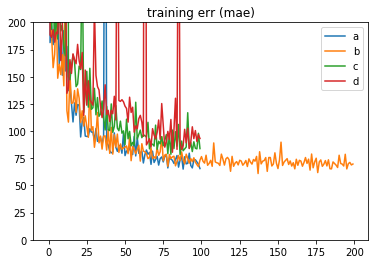

In [77]:
plt.plot(p2)
plt.ylim([0,200])
plt.legend(['a','b','c','d'])
plt.title('training err (mae)')

In [73]:
val_errs = [h['val_mean_absolute_error'] for h in hist]

In [74]:
p3 = pd.DataFrame(val_errs).T

Text(0.5, 1.0, 'validation err (mae)')

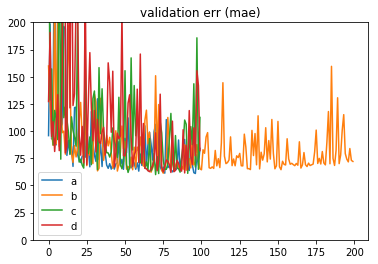

In [76]:
plt.plot(p3)
plt.ylim([0,200])
plt.legend(['a','b','c','d'])
plt.title('validation err (mae)')

So, baseline, 'a'/blue-line, out-performs any of other the permutations.

Extra epochs doesn't help either, by the time we reach epoch=100, we've hit an asymptote.

##### Eval Training vs Test

In [81]:
#build test data
random.seed(a=1, version=2)
N = 300
batch_test = random.sample(list(truth_0.keys()), N)

x_load_test = [loadImg(k) for k in batch_test]

xPrep = DataXPrep(data=x_load_test)
xPrep.buildDataT(
               b_resize=True,
               resize_width=108,
               b_cvt_grayscale=False
              )
x_t_test = xPrep.getDataT()

In [88]:
y0_load_test = [truth_0[k] for k in batch_test]
yPrep = DataYPrep()
y0_test = yPrep.normData_static(y0_load_test)

In [78]:
models_y0 = mb_y0.models.copy()

In [93]:
for _k, _model in models_y0.items():
    try:
        train_err = mb_y0.eval(_model, x=x_t, y=y0)
        test_err  = mb_y0.eval(_model, x=x_t_test, y=y0_test)
    except:
        continue
    print('model: %s - train mae: %i, test mae: %i' % 
          (_k, int(train_err[1]), int(test_err[1]) ) )

model: 0 - train mae: 72, test mae: 85
model: 1 - train mae: 52, test mae: 77
model: 2 - train mae: 103, test mae: 119
model: 3 - train mae: 68, test mae: 81


so model 'b' with 200-epochs does have better mae, why is this not apparent from the history graph?

### Save models

In [96]:
p_save = '../models/model_data/model_y0_'
for _k, _model in models_y0.items():
    _model.save(p_save + str(_k) + '.h5')